<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project: Acne detection using Convolutional Neural Network (Part 3/3)

---

## Contents:
- [1. Import libraries and load the model](#1.-Import-libraries-and-load-the-model)
- [2. Load Test Data](#2.-Load-Test-Data)
- [3. Test-Predictions](#3.-Test-Predictions)
- [4. Conclusion-and-Recommendation](#4.-Conclusion-and-Recommendation)
- [5. Limitation-and-future-work](#5.-Limitation-and-future-work)
- [6. Making new Prediction using random photos](#6.-Making-new-Prediction-using-random-photos)
- [7. Function for Face Detection, Capture Photo and Classification prediction](#7.-Function-for-Face-Detection,-Capture-Photo-and-Classification-prediction)

## 1. Import libraries and load the model

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import pandas as pd

In [2]:
# Load the model 
model = load_model('model_auto_preprocessed.h5')

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 2. Load Test Data

In [3]:
# Define labels and image size
labels = ['NON_ACNE', 'ACNE']
img_size = 150

In [4]:
# Convert image into numpy array with labels, image resize to 150X150
def get_data(data_dir):
    labels = ['NON_ACNE', 'ACNE']
    img_size = 150
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [6]:
# test data in np.array
test = get_data('assets0/test')

Text(0.5, 1.0, 'ACNE')

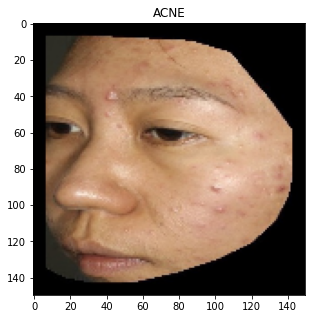

In [7]:
# plot the acne photo
plt.figure(figsize = (5,5))
plt.imshow(test[-1][0])
plt.title(labels[test[-1][1]])

In [8]:
x_test = []
y_test = []

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_test = np.array(x_test) / 255

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

## 3. Test Predictions

In [9]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_test, predictions, target_names = ['NON_ACNE','ACNE']))

              precision    recall  f1-score   support

    NON_ACNE       0.96      0.99      0.97       230
        ACNE       0.98      0.95      0.97       200

    accuracy                           0.97       430
   macro avg       0.97      0.97      0.97       430
weighted avg       0.97      0.97      0.97       430



#### Note: 
The accuracy of the model for validation images is 97% which is comparable to the accuracy for the test images. 

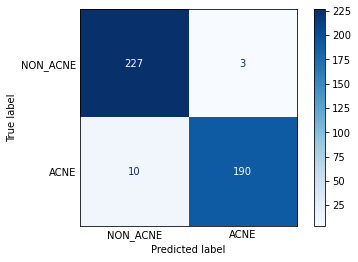

In [41]:
target_names=['NON_ACNE','ACNE']
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(include_values=True,cmap='Blues')
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(False)

#### Note: 
The model has FP of 3 and FN of 10. 

In [11]:
# To load test data
path_dir='C:\\Users\\ASUS\\Downloads\\1. GA\\GA Capstone\\Capstone_acne\\assets0\\test\\'

In [37]:
# Dataframe for filename
data=pd.DataFrame(os.listdir(path_dir+"\\ACNE\\"),columns=['filename'])
data_non=pd.DataFrame(os.listdir(path_dir+"\\NON_ACNE\\"),columns=['filename'])
data_2=pd.concat([data,data_non],axis=0, ignore_index=True)

# Dataframe for labels
data_labels=pd.DataFrame(y_test,columns=['labels'])

# Dataframe for prediction
data_pred=pd.DataFrame(predictions,columns=['pred'])

# Dataframe with filename,labels,prediction
df=pd.concat([data_2,data_labels,data_pred],axis=1)

In [38]:
df.head()

,filename,labels,pred
0,Acne (1).jpg.jpg,0,0
1,Acne (1000).jpg.jpg,0,0
2,Acne (1005).jpg.jpg,0,0
3,Acne (1038).jpg.jpg,0,0
4,Acne (1041).jpg.jpg,0,0


In [40]:
# To list the images that was wrongly predicted
diff=[]
for i in range(len(df)):
    if df.iloc[i]['labels']==df.iloc[i]['pred']:
        pass
    else:
        a=df.iloc[i]['filename']
        diff.append(a)
print(diff)

['Acne (488).jpg.jpg', 'Acne (599).jpg.jpg', 'Acne (628).jpg.jpg', 'Non_acne (1198).jpg.jpg', 'Non_acne (209).jpg.jpg', 'Non_acne (401).jpg.jpg', 'Non_acne (415).jpg.jpg', 'Non_acne (419).jpg.jpg', 'Non_acne (429).jpg.jpg', 'Non_acne (444).jpg.jpg', 'Non_acne (458).jpg.jpg', 'Non_acne (492).jpg.jpg', 'Non_acne (911).jpg.jpg']


## 4. Conclusion and Recommendation

## 5. Limitation and future work

## 6. Making new Prediction using random photos

In [ ]:
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
session = tf.compat.v1.Session(config=config)

tf.compat.v1.keras.backend.get_session
cv2.ocl.setUseOpenCL(False)

In [ ]:
# Function for face detection and cropping of face
def detect_face(img):
    face_img = img.copy()
    #Reads face using haarcascades 
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')
    face_rects = face_cascade.detectMultiScale(face_img,
                                               scaleFactor=1.2,
                                               minNeighbors=5,
                                               minSize=(150, 150)
                                              )
    # to add border to photo
    borderType = cv2.BORDER_CONSTANT
    
    if len(face_rects)==0:
        global faces
        faces = face_img
        #Size for border
        top = int(0.05*faces.shape[0])
        bottom = top
        left = int(0.05*faces.shape[1])
        right=left
        faces=cv2.copyMakeBorder(faces,top,bottom,left,right,borderType,None,[0,0,0])
    else: 
        for (x,y,w,h) in face_rects: 
            cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,0,0), 10)
            faces = face_img[y:y + h, x:x + w]
            #Size for border
            top = int(0.05*faces.shape[0])
            bottom = top
            left = int(0.05*faces.shape[1])
            right=left
            faces=cv2.copyMakeBorder(faces,top,bottom,left,right,borderType,None,[0,0,0])
    return faces

In [ ]:
# Function to predict the class of the photo taken
def return_prediction(model,detect_face,file):
    # Read the input image
    test = cv2.imread(file)
    test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
    result = detect_face(test)
    plt.imshow(result)
    result = cv2.resize(result, (150, 150))
    result = np.asarray(result)
    result = np.expand_dims(result, axis=0)
    result = result/255
    prediction_prob = model.predict(result)
    prediction_prob=np.round(prediction_prob)
    # Output prediction
    print(f'Probability that image is acne is: {prediction_prob} ')
    return prediction_prob

In [ ]:
return_prediction(model,detect_face,'testing11.jpg')

In [ ]:
return_prediction(model,detect_face,'testing12.jpg')

In [ ]:
return_prediction(model,detect_face,'testing13.jpg')

In [ ]:
return_prediction(model,detect_face,'testing14.jpg')

In [ ]:
return_prediction(model,detect_face,'testing15.jpg')

In [ ]:
return_prediction(model,detect_face,'testing16.jpg')

In [ ]:
return_prediction(model,detect_face,'testing17.jpg')

In [ ]:
return_prediction(model,detect_face,'testing18.jpg')

In [ ]:
return_prediction(model,detect_face,'testing19.jpg')

In [ ]:
return_prediction(model,detect_face,'testing20.jpg')

In [ ]:
return_prediction(model,detect_face,'testing21.jpg')

## 7. Function for Face Detection, Capture Photo and Classification prediction

In [ ]:
# Function for face detection and cropping of face
def detect_face(img):
    face_img = img.copy()
    #Reads face using haarcascades 
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')
    face_rects = face_cascade.detectMultiScale(face_img,
                                               scaleFactor=1.2,
                                               minNeighbors=5,
                                               minSize=(150, 150)
                                              )
    # to add border to photo
    borderType = cv2.BORDER_CONSTANT
    
    if len(face_rects)==0:
        global faces
        faces = face_img
        #Size for border
        top = int(0.05*faces.shape[0])
        bottom = top
        left = int(0.05*faces.shape[1])
        right=left
        faces=cv2.copyMakeBorder(faces,top,bottom,left,right,borderType,None,[0,0,0])
    else: 
        for (x,y,w,h) in face_rects: 
            cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,0,0), 10)
            faces = face_img[y:y + h, x:x + w]
            #Size for border
            top = int(0.05*faces.shape[0])
            bottom = top
            left = int(0.05*faces.shape[1])
            right=left
            faces=cv2.copyMakeBorder(faces,top,bottom,left,right,borderType,None,[0,0,0])
    return faces

In [ ]:
# Function to predict the class of the photo taken
def return_prediction(model,detect_face,file):
    # Read the input image
    test = cv2.imread(file)
    test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
    result = detect_face(test)
    plt.imshow(result)
    result = cv2.resize(result, (150, 150))
    result = np.asarray(result)
    result = np.expand_dims(result, axis=0)
    result = result/255
    prediction_prob = model.predict(result)
    prediction_prob=np.round(prediction_prob)
    # Output prediction
    print(f'Probability that image is acne is: {prediction_prob} ')
    return prediction_prob

In [ ]:
# Function to capture photo via webcam and save as .jpg file
import cv2

cam = cv2.VideoCapture(0)
img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.jpg".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()
cv2.destroyAllWindows()

In [ ]:
return_prediction(model,detect_face,img_name)